<a href="https://colab.research.google.com/github/odu-cs625-datavis/public/blob/main/fall21/CS625_F21_R_Annotations_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R Annotations Examples

Code snippets from [Chapter 28 (Graphics for Communication)](https://r4ds.had.co.nz/graphics-for-communication.html) in [*R for Data Science*](https://r4ds.had.co.nz)

In [7]:
library(tidyverse)
library(scales)        # allows us to format axes labels with commas
options(scipen=999)    # prevent using scientific notation
theme_set(
  theme_bw()   # selects a black and white theme
  + theme(text = element_text(size = 20))  # sets larger font size
#  + theme(plot.margin = margin(0.5, 1, 0, 0, "cm"))
#  + theme (plot.background = element_rect(fill = "grey90", colour = "black", size = 1)))
)

In [4]:
# function to set plot sizes in notebook
# ex: fig (10,4)
# https://www.kaggle.com/getting-started/105201
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

## 28.2 Labels

Add plot title

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



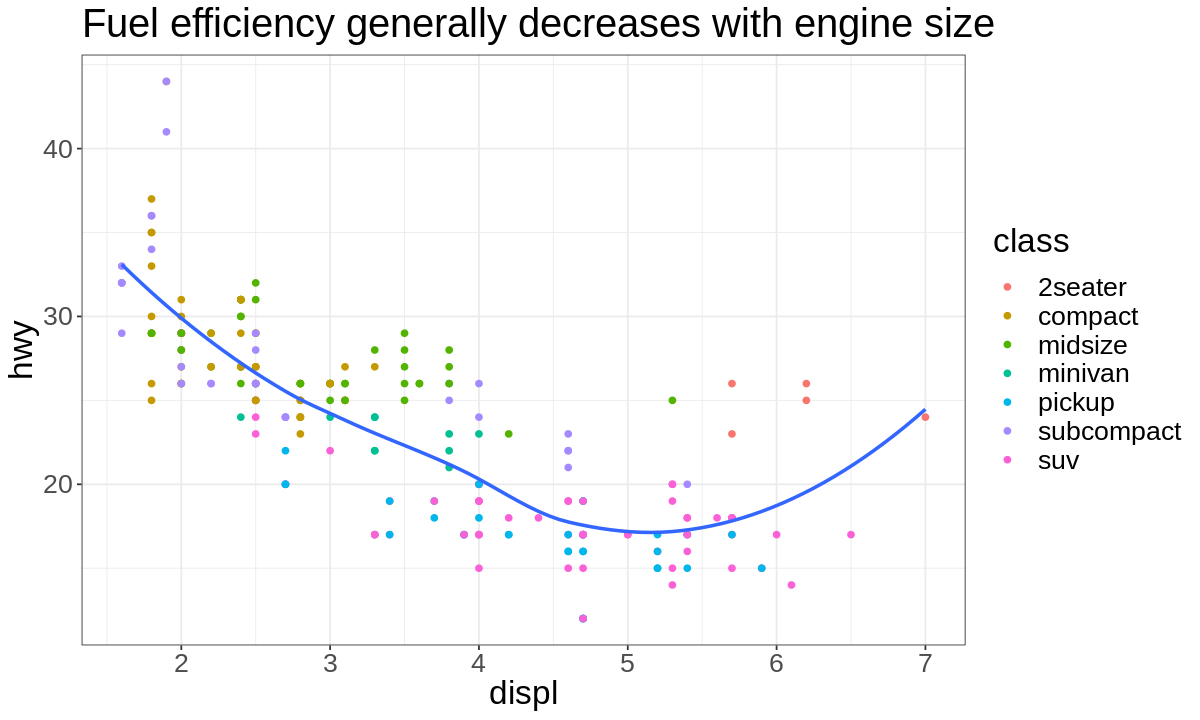

In [8]:
fig (10, 6)
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE) +
  labs(title = "Fuel efficiency generally decreases with engine size")

Add subtitle, caption

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



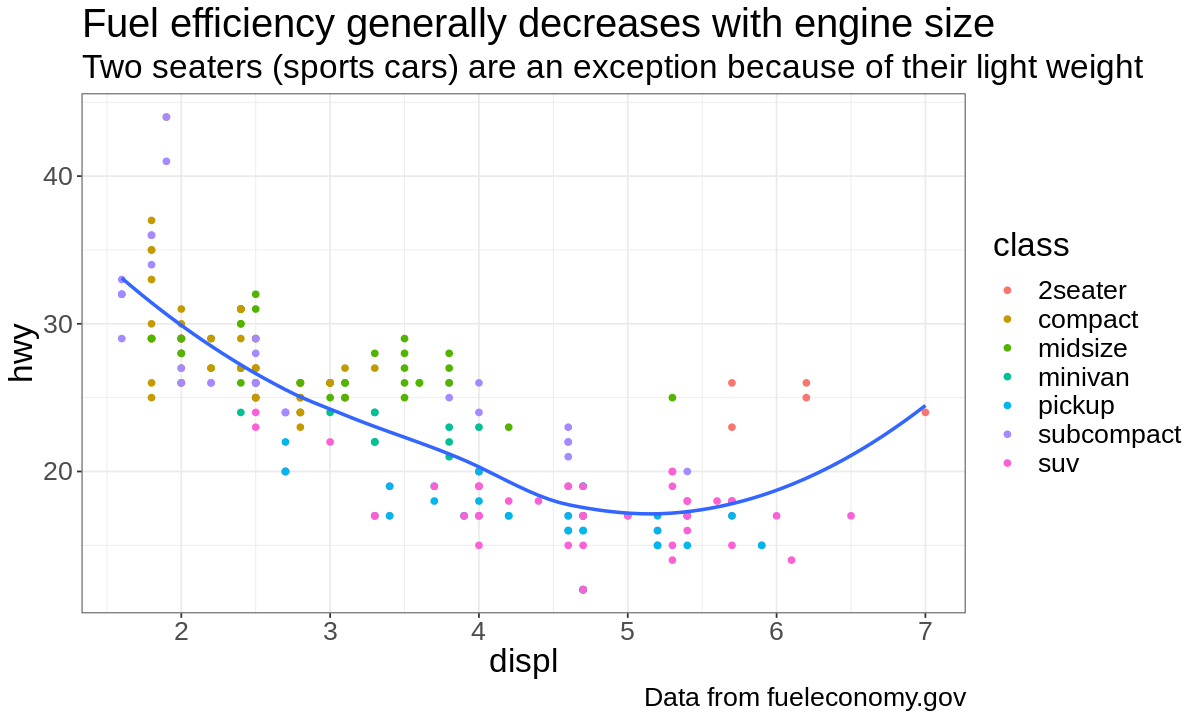

In [9]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE) +
  labs(
    title = "Fuel efficiency generally decreases with engine size",
    subtitle = "Two seaters (sports cars) are an exception because of their light weight",
    caption = "Data from fueleconomy.gov"
  )

Change x, y, legend labels

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



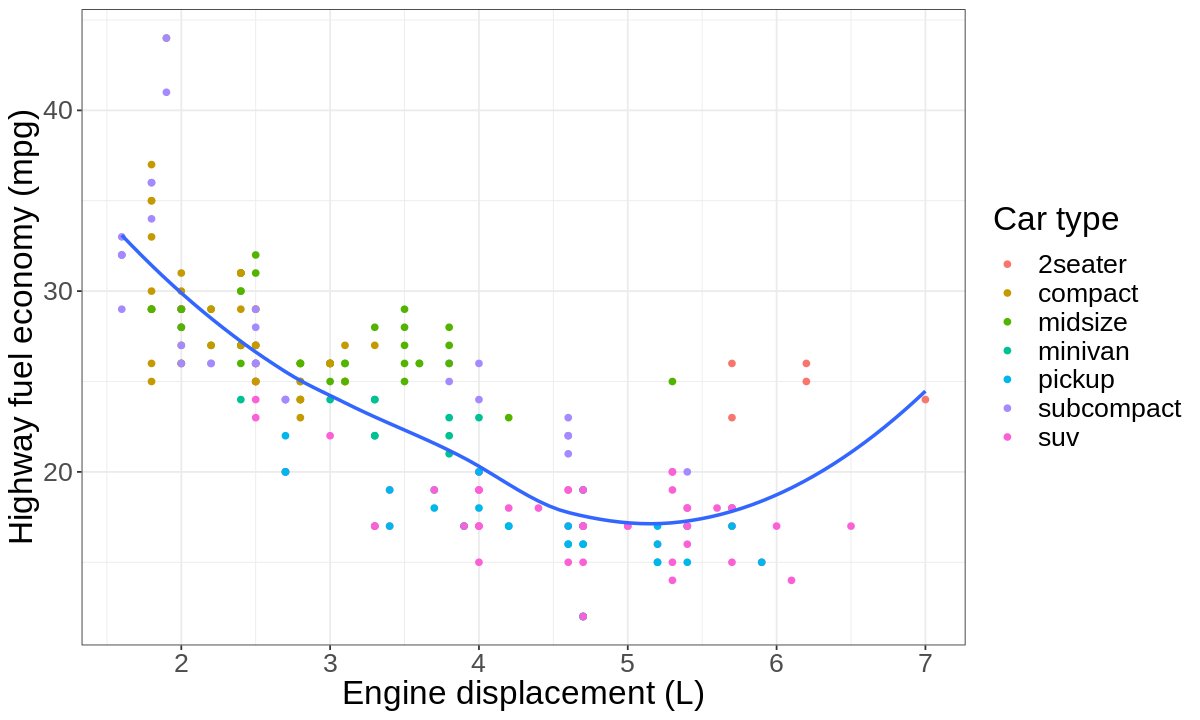

In [10]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_smooth(se = FALSE) +
  labs(
    x = "Engine displacement (L)",
    y = "Highway fuel economy (mpg)",
    colour = "Car type"
  )

## 28.3 Annotations

Directly annotate with `geom_text`

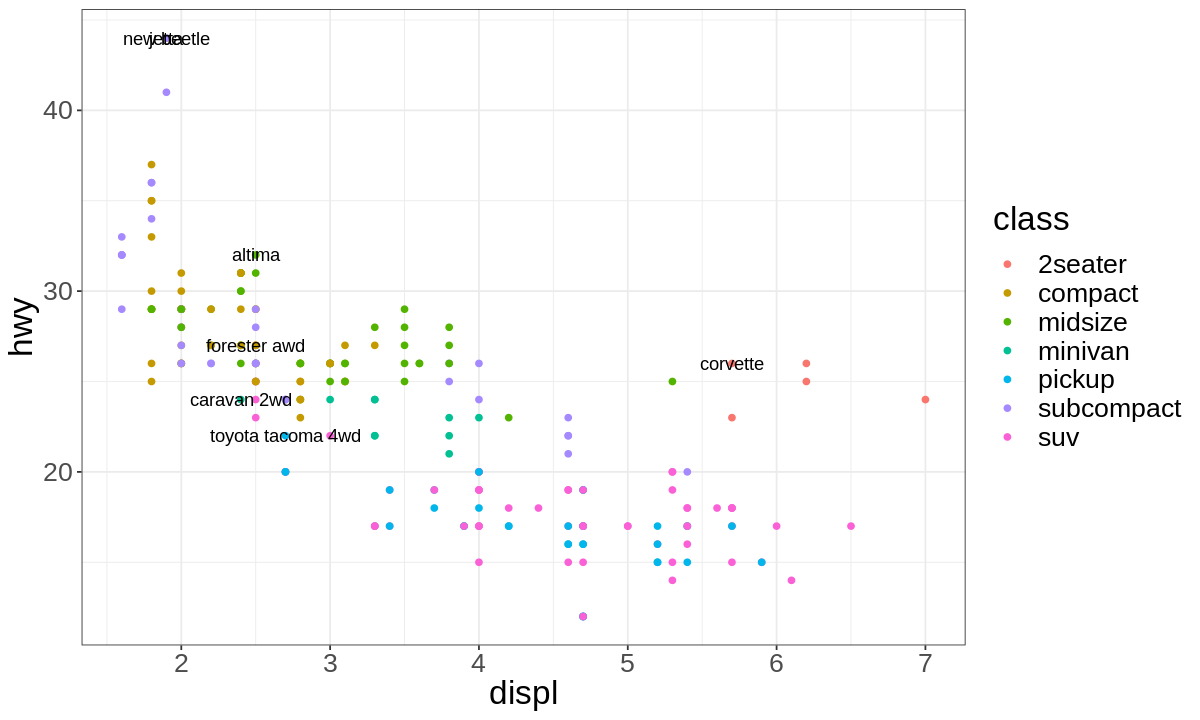

In [11]:
best_in_class <- mpg %>%
  group_by(class) %>%
  filter(row_number(desc(hwy)) == 1)

ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_text(aes(label = model), data = best_in_class)

Use `nudge_y`

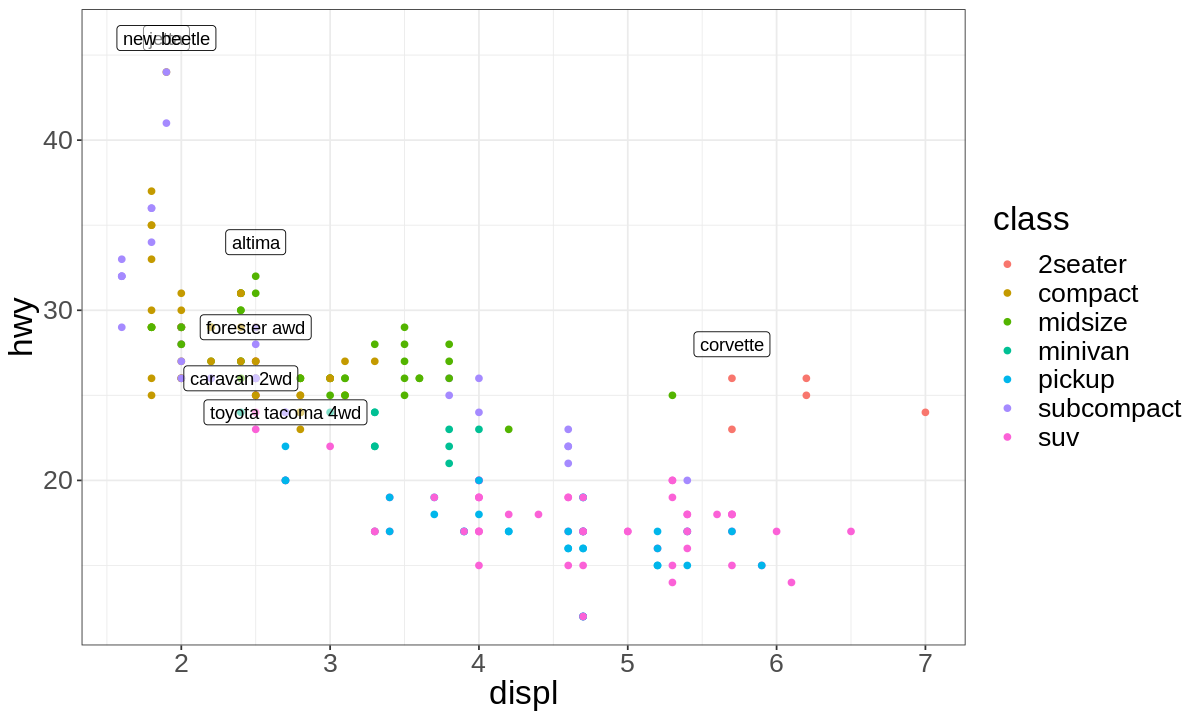

In [12]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_label(aes(label = model), data = best_in_class, nudge_y = 2, alpha = 0.5)

Use `ggrepel` package to automatically adjust labels to prevent overlapping

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



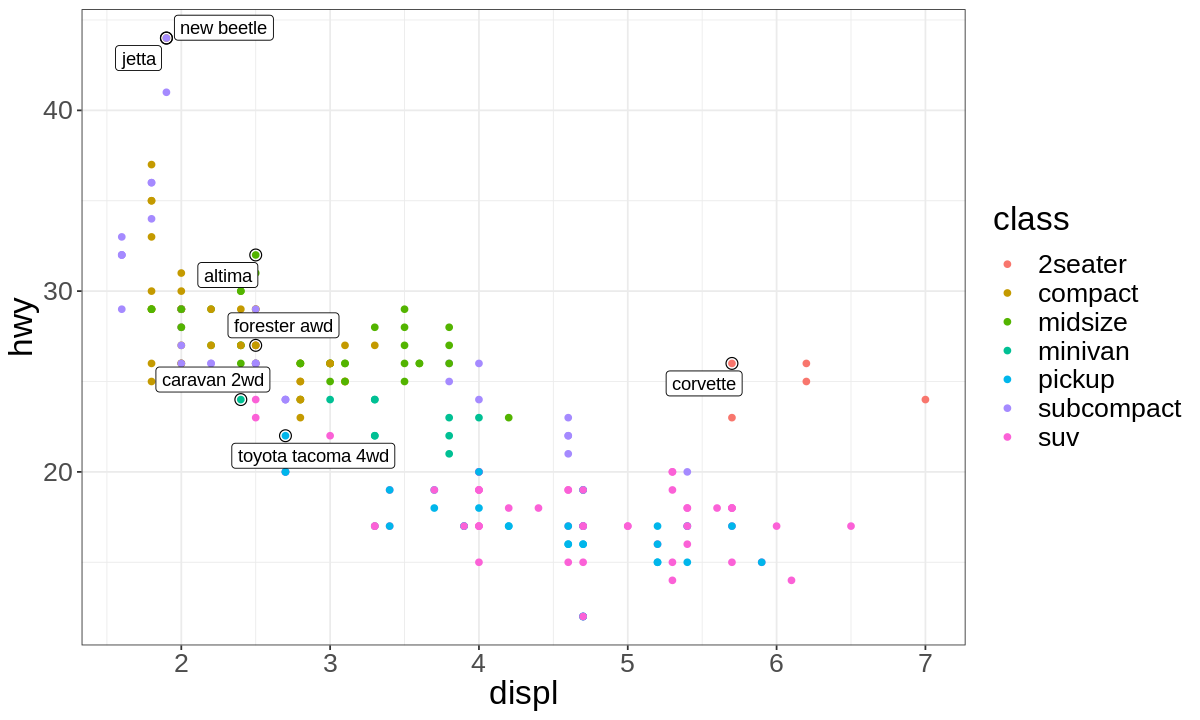

In [15]:
install.packages("ggrepel")
library(ggrepel)
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_point(size = 3, shape = 1, data = best_in_class) + # outlines to emphasize labeled points
  ggrepel::geom_label_repel(aes(label = model), data = best_in_class)

Apply legend labels directly to chart

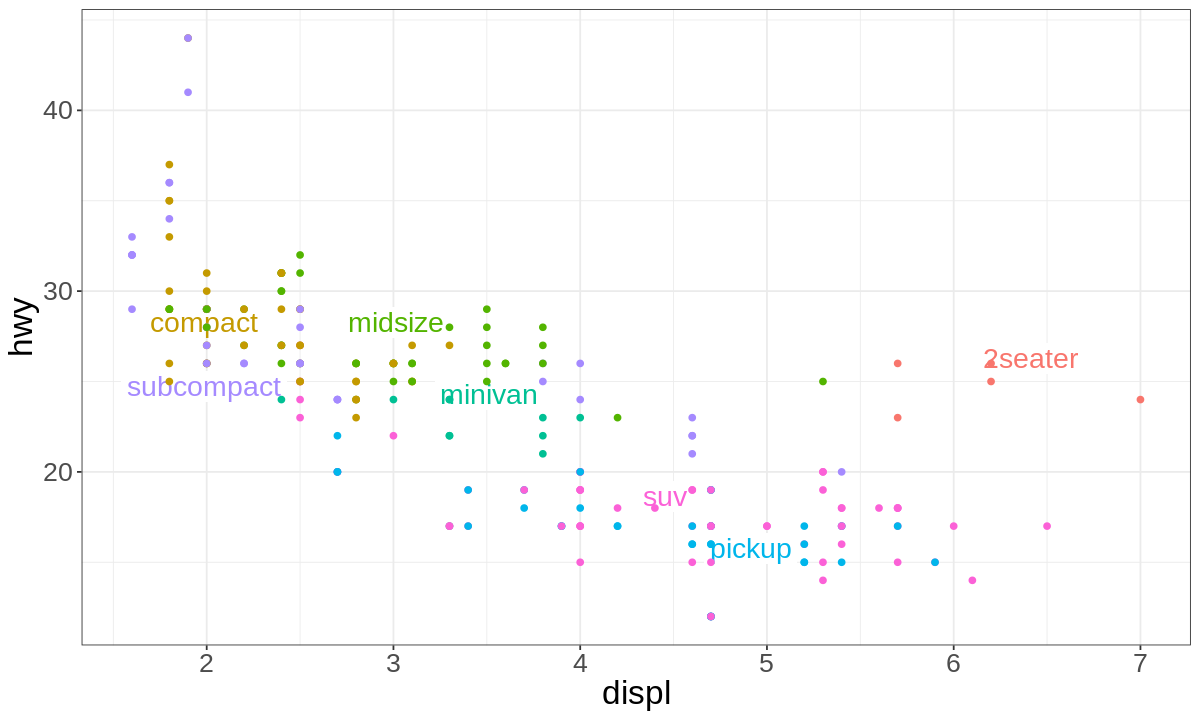

In [20]:
class_avg <- mpg %>%
  group_by(class) %>%
  summarise(
    displ = median(displ),
    hwy = median(hwy)
  )

ggplot(mpg, aes(displ, hwy, colour = class)) +
  ggrepel::geom_label_repel(aes(label = class),
    data = class_avg,
    size = 6,
    label.size = 0,
    segment.color = NA
  ) +
  geom_point() +
  theme(legend.position = "none") # turn off legend

Adding label to a certain region of the chart

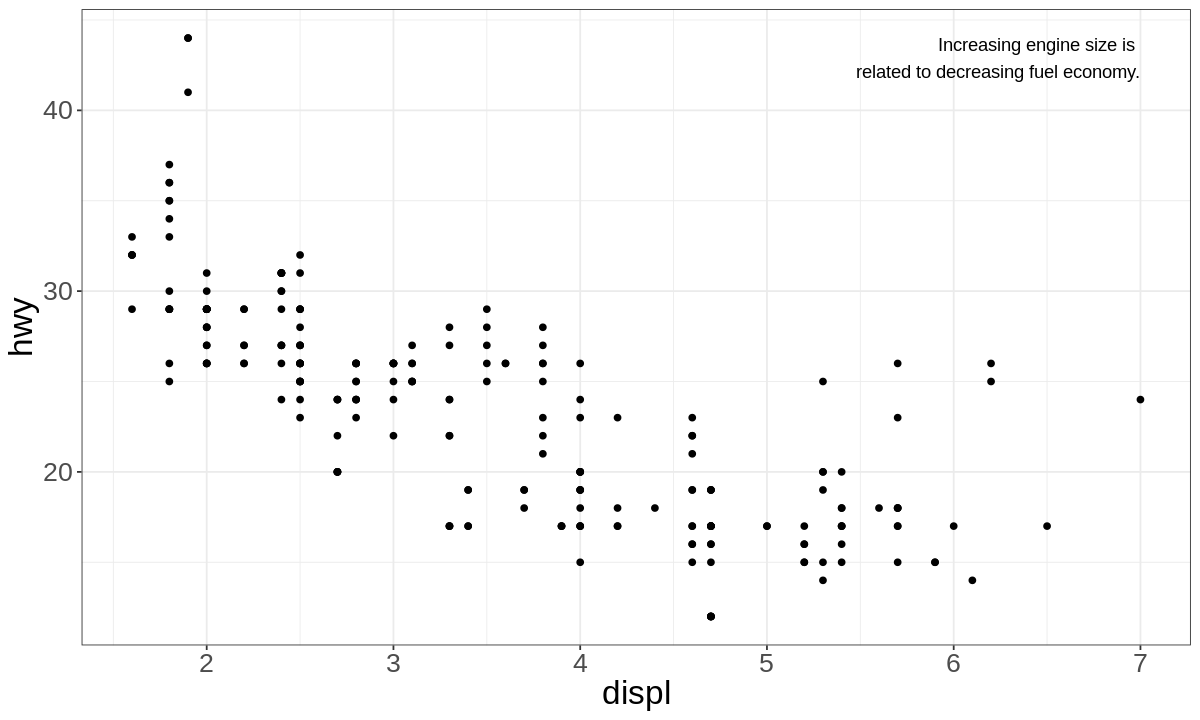

In [21]:
label <- mpg %>%
  summarise(
    displ = max(displ),
    hwy = max(hwy),
    label = "Increasing engine size is \nrelated to decreasing fuel economy."
  )

ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  geom_text(aes(label = label), data = label, vjust = "top", hjust = "right")

Example with `geom_hline()`

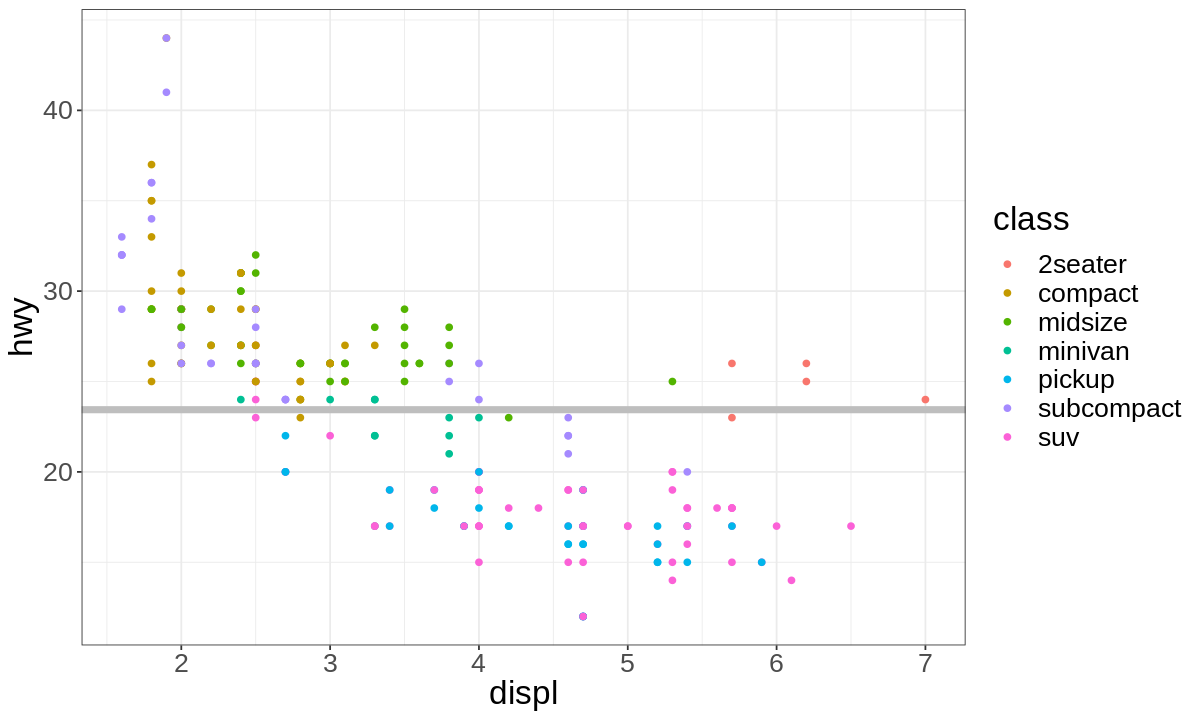

In [41]:
mean_hwy = mean(mpg$hwy)

ggplot(mpg, aes(displ, hwy)) +
  geom_hline(yintercept = mean_hwy, size=2, color="gray") +  # draw line first so data points go on top
  geom_point(aes(colour = class))

`geom_vline()` with intercept set to specific value

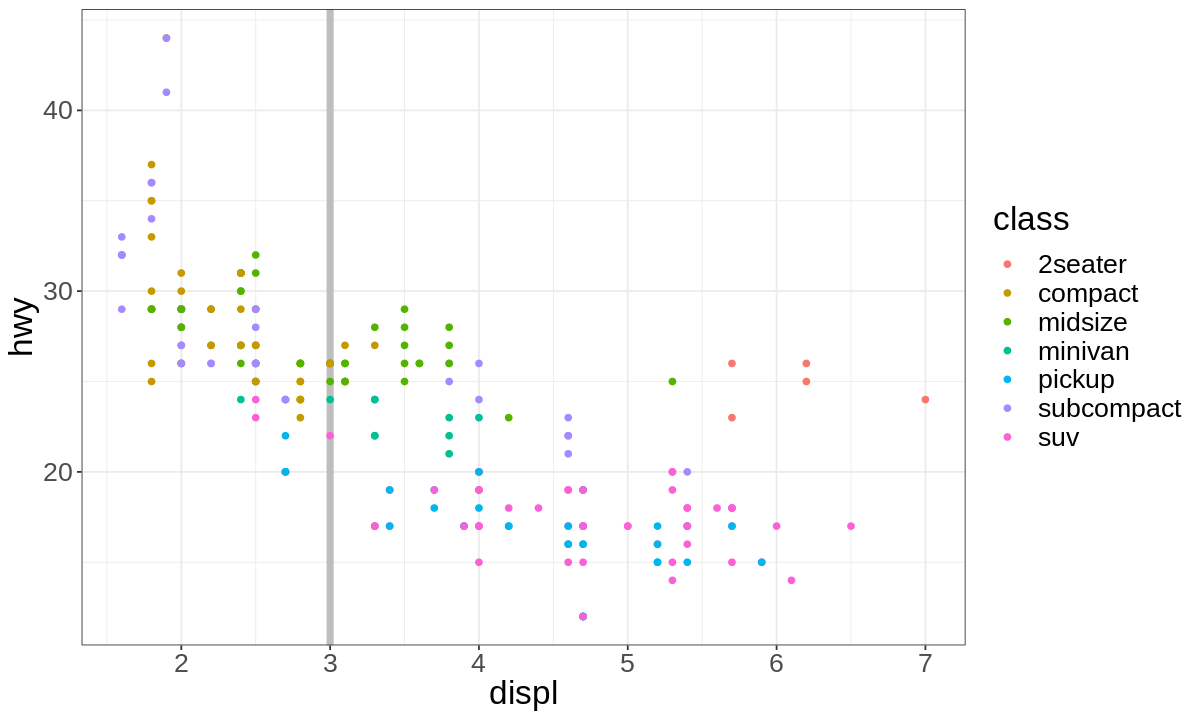

In [30]:
ggplot(mpg, aes(displ, hwy)) +
  geom_vline(xintercept=3, size=2, color="gray") +  # draw line first so data points go on top
  geom_point(aes(colour = class))

`geom_rect()`

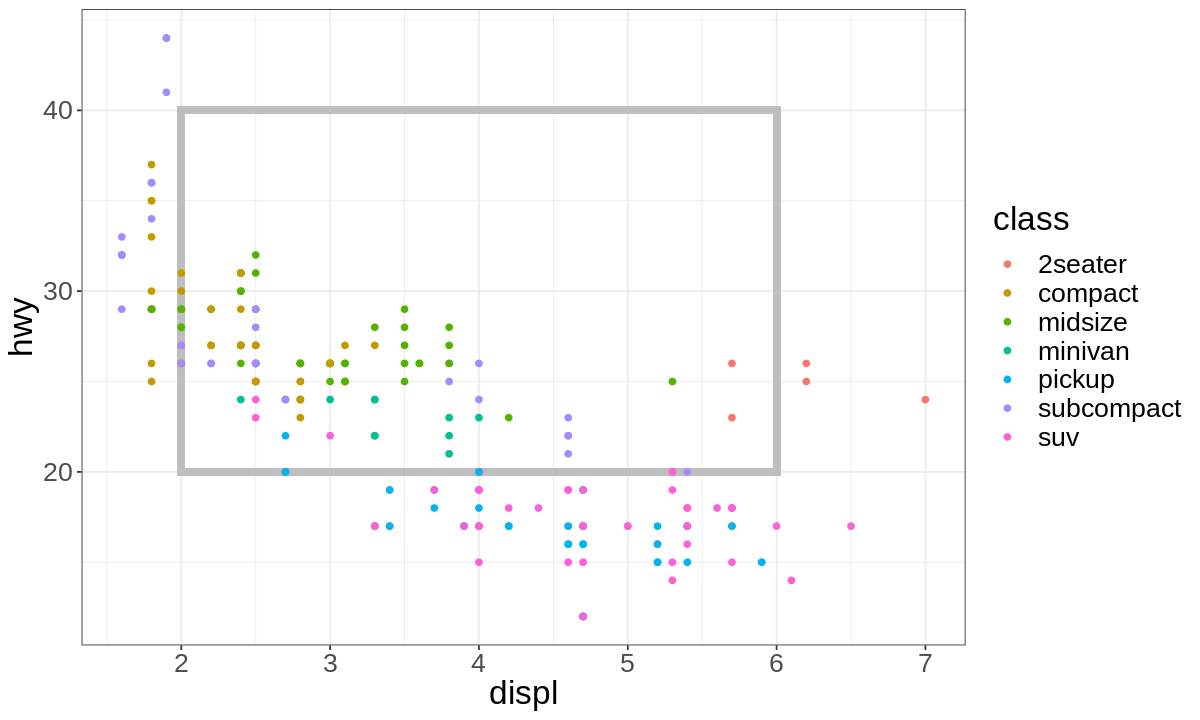

In [47]:
ggplot(mpg, aes(displ, hwy)) +
  geom_rect(xmin=2, xmax=6, ymin=20, ymax=40, size=2, color="gray", fill=NA) 
  geom_point(aes(colour = class))

`geom_segment()`

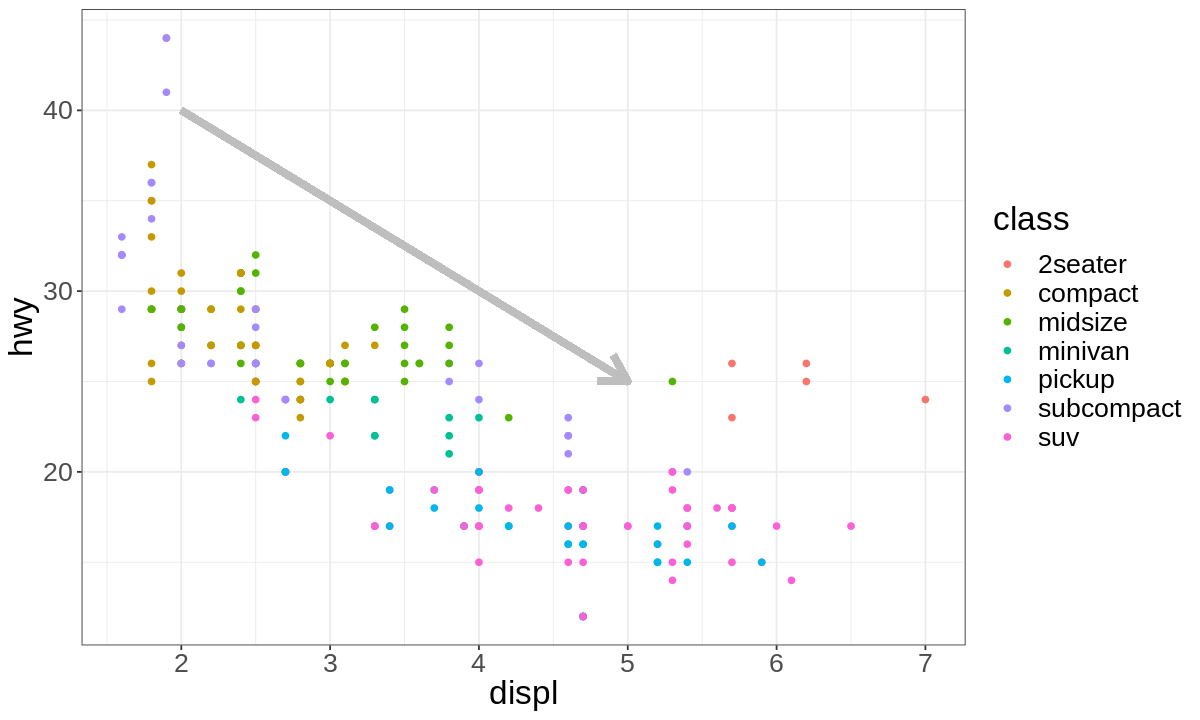

In [52]:
ggplot(mpg, aes(displ, hwy)) +
  geom_segment(x=2, y=40, xend=5, yend=25, size=2, color="gray", arrow=arrow()) +
  geom_point(aes(colour = class))

## 28.4 Scales

Axis ticks and legend keys

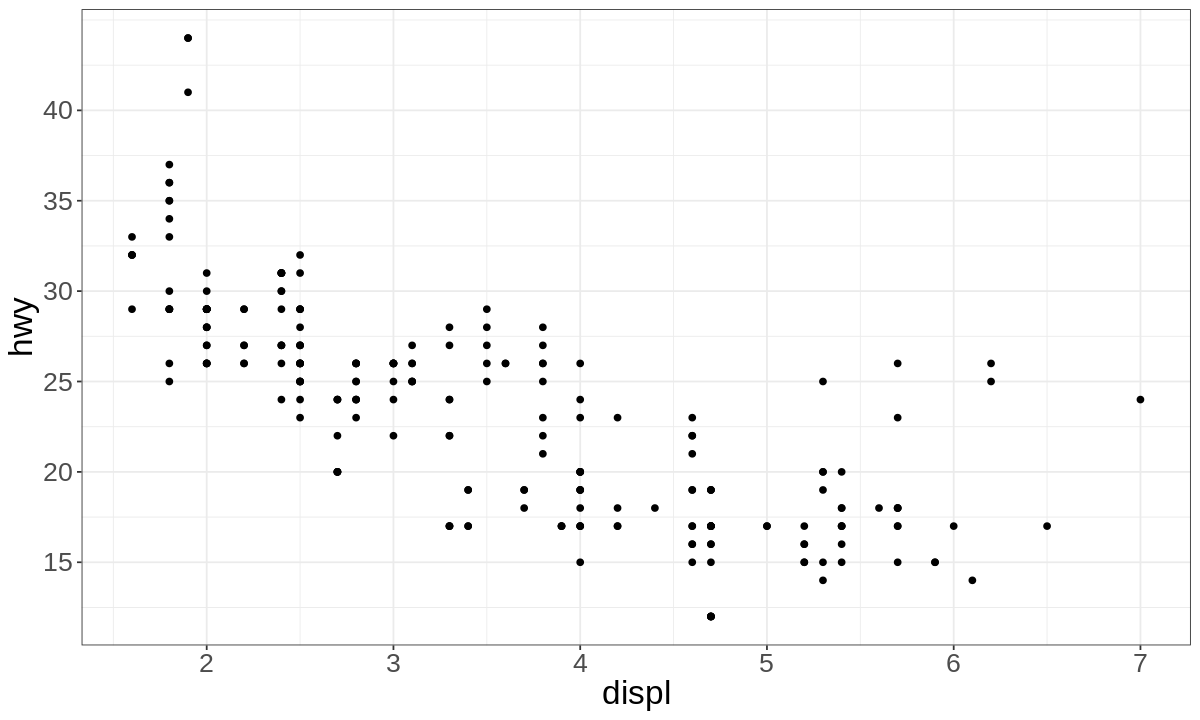

In [53]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  scale_y_continuous(breaks = seq(15, 40, by = 5))

legend layout

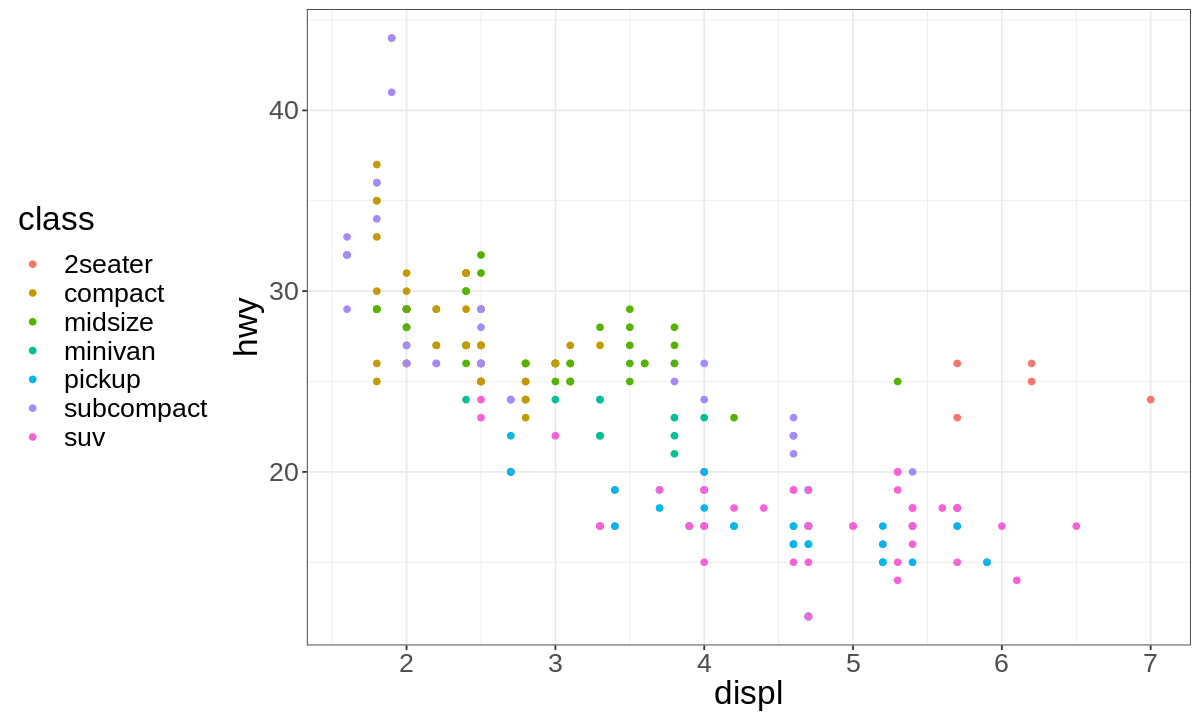

In [55]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) + 
  theme(legend.position = "left") # left, top, bottom, right, none

Setting log scale and replacing axis labels

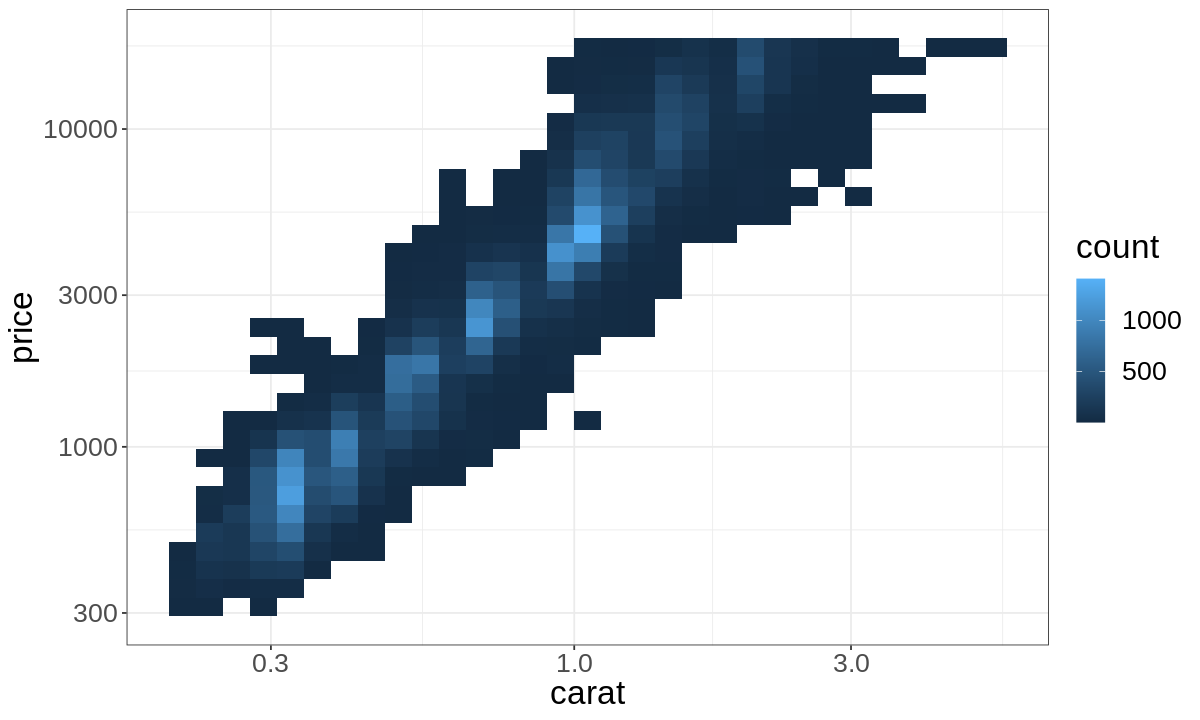

In [56]:
ggplot(diamonds, aes(carat, price)) +
  geom_bin2d() + 
  scale_x_log10() + 
  scale_y_log10()

Changing color scales

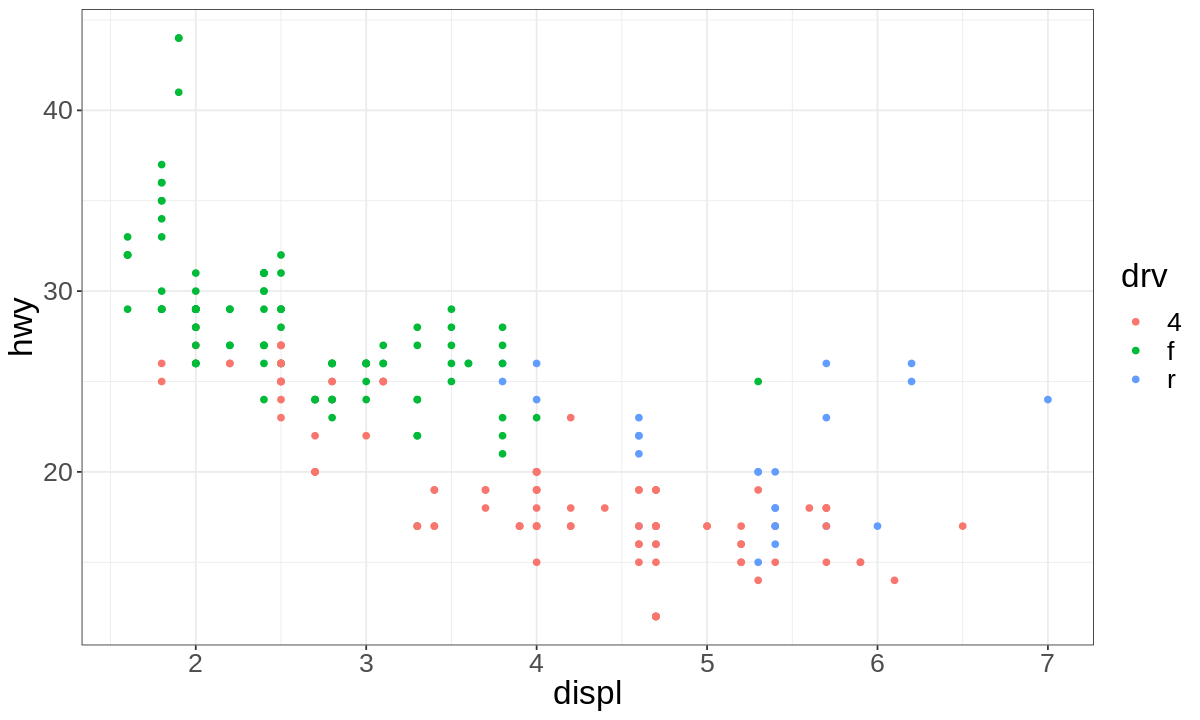

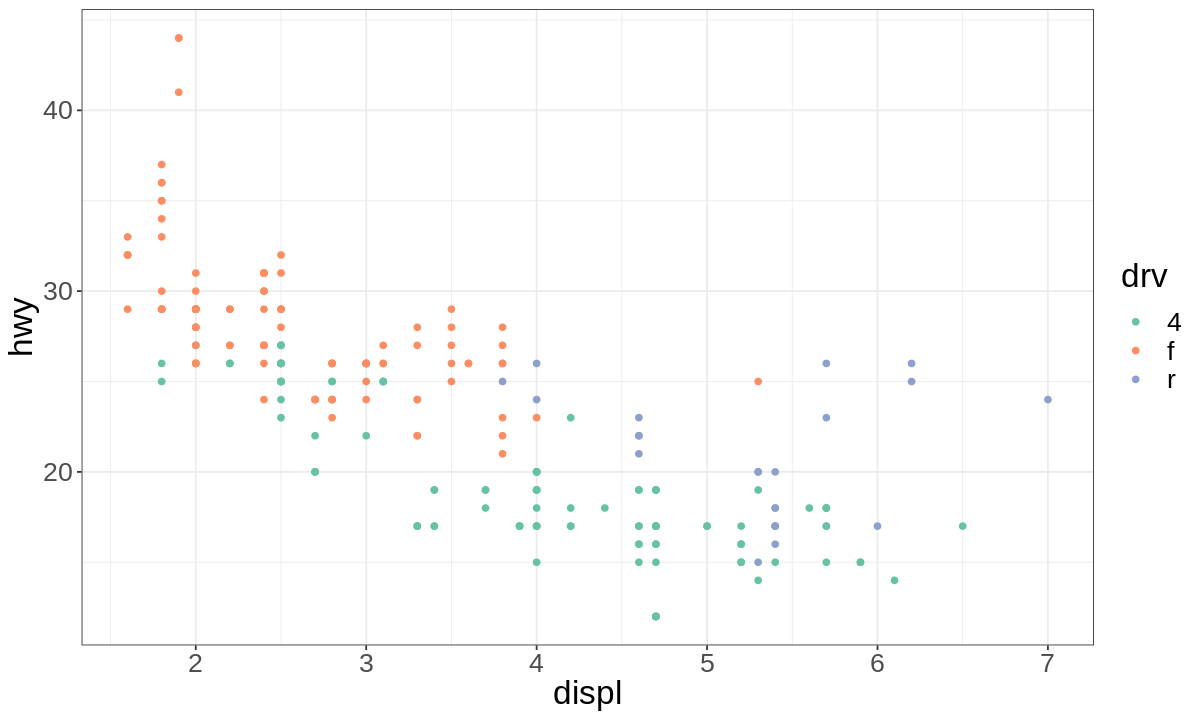

In [58]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = drv))

ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = drv)) +
  scale_colour_brewer(palette = "Set2")

## There's More!

Make sure to look at 28.5 Zooming, 28.6 Themes, and 28.7 Saving your plots